### OUTLINE 

            1. INTRODUCTION
            2. TSNE & PCA
            3. ALGORITHM
            4. APPLICATIONS & PYTHON'S IMPLEMENT
            5. SUMMARIZES


### 1. INTRODUCTION.

**`(t-SNE)` or `t-Distributed Stochastic Neighbor Embedding`** is a `non-linear dimensionality reduction algorithm` used for `exploring high-dimensional data`. 

It maps multi-dimensional data to two or more dimensions suitable for human observation. With help of the `t-SNE algorithms`, *we may have to plot fewer exploratory data analysis plots next time you work with high dimensional data*.

### 2. `t-SNE `& `PCA`.

There are some `limitations` of `PCA`:

 **`PCA`** is a **`linear algorithm`**. It will `not` be able to `interpret complex polynomial relationship between features`. On the other hand, **`t-SNE`** is based on **`probability distributions`** with **`random walk`** on neighborhood graphs to find the structure within the data.

A **`major problem`** with, **`linear dimensionality reduction algorithms`** is that they `concentrate` on placing **`dissimilar`** data points far apart in a lower dimension representation. 

But in order to represent high dimension data on low dimension, **`non-linear manifold`**, it is important that **`similar datapoints must be represented close together`**, which is not what linear dimensionality reduction algorithms do.

**`Local approaches`** seek to map nearby points on the manifold to nearby points in the low-dimensional representation.

**`Global approaches`** on the other hand attempt to preserve geometry at all scales, i.e mapping nearby points to nearby points and far away points to far away points  

It is important to know that most of the nonlinear techniques other than t-SNE are not capable of retaining both the local and global structure of the data at the same time.


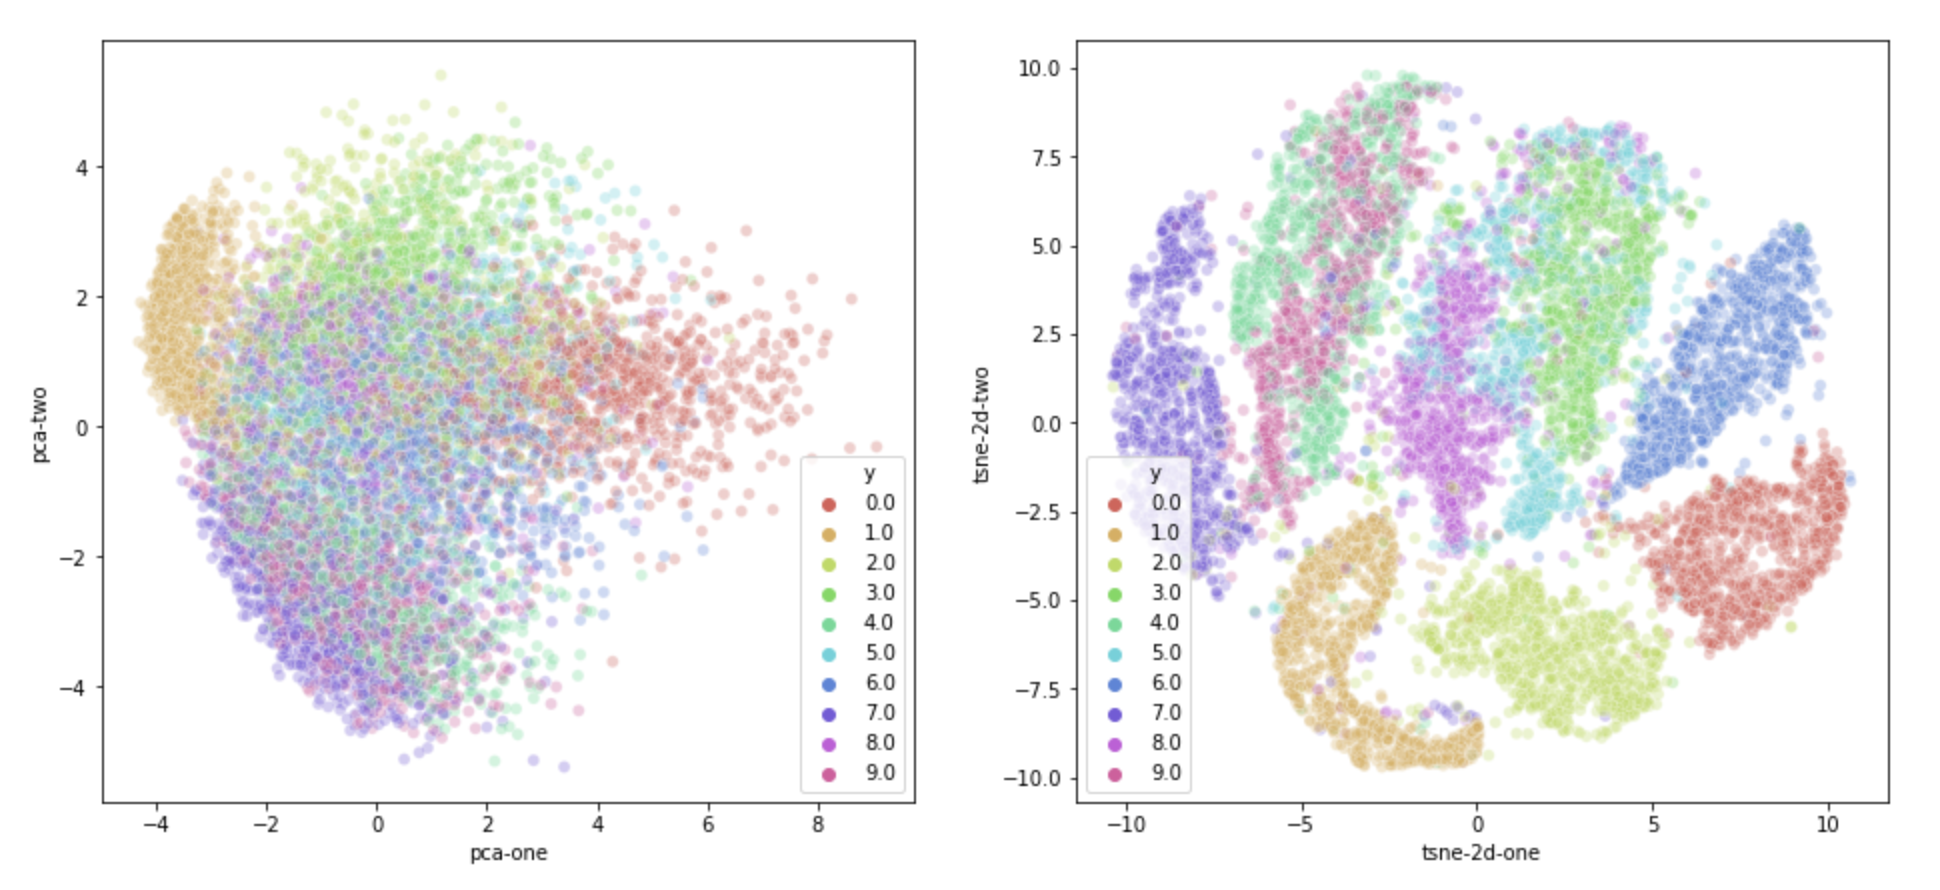

In [182]:
# ---------------------------------- Hiden code ---------------------------------------
# !jt -t oceans16 -cursc r -cursw 5
from IPython.core.display import Image, display
display(Image(r"C:\Users\Admin\Desktop\Nhan_pro\Data\tsne-pca.png", width=960, unconfined=True))

### 3. `t-SNE` 's algorithm

**Step 1.** `Stochastic Neighbor Embedding (SNE)` *starts by converting* ***the high-dimensional Euclidean distances*** between data points into conditional probabilities that represent similarities. 

The `similarity` of datapoint $x_i$ to $x_j$  is the `conditional probability` $p_{j \vert i}$ `:= {` $x_i$ `would pick` $x_j$ `as its neighbor if neighbors were picked in proportion to their probability density under a Gaussian centered at` $x_i$ `}`

- For `nearby datapoints`, the $p_{j \vert i}$ is relatively high, whereas 
- for `widely separated datapoints`, the $p_{i \vert j}$ is will be almost infinitesimal (for reasonable values of the variance of the Gaussian $\mathcal{N} \left( x_i, \sigma_i^2 \right)$ centered at the datapoint $x_i$,

So

$$ p_{j \vert i}=\dfrac{\exp\left(-\frac{\Vert x_{i}-x_{j}\Vert^{2}}{2\sigma_{i}^{2}}\right)}{\sum_{k\neq i}\exp\left(-\frac{\Vert x_{i}-x_{k}\Vert^{2}}{2\sigma_{i}^{2}}\right)} $$

**Step 2.** For ***the low-dimensional counterparts*** $y_i$ and $y_j$ of the high-dimensional datapoints $x_i, x_j$ it is possible to compute a similar conditional probability, which we denote by $q_{j \vert i}$,

$$ q_{j \vert i}=\dfrac{\exp\left(-\frac{\Vert y_{i} - y_{j}\Vert^{2}}{2\sigma_{i}^{2}}\right)}{\sum_{k\neq i}\exp\left(-\frac{\Vert y_{i} - y_{k}\Vert^{2}}{2\sigma_{i}^{2}}\right)} $$

-----------------------

***Note that, $p_{i|i}$ and $p_{j|j}$ are set to zero as we only want to model `pair wise similarity`*** (for the `high dimensional space` in *step 1* and `low dimensional space` in *step 2*.

---------------------------

For the **sake of simplicity**, try to understand this in detail. 

- Let us map `3D space to 2D space`. What *step1* and *step2* are doing is calculating the probability of similarity of points in 3D space and calculating the `probability of similarity` of points in the corresponding `2D space`.
- Logically, the `conditional probabilities` $p_{j | i}, q_{j | i}$ must be equal for a `perfect representation` of the `similarity` of the datapoints in the different dimensional spaces, i.e the difference between $p_{j | i}, q_{j | i}$ must be $0$ for the `perfect replication` of the plot in `high and low dimensions`.

**Step 3.** By this logic SNE attempts to **minimize this `difference of conditional probability`**. To measure the minimization of sum of difference of `conditional probability SNE` minimizes the sum of **`Kullback-Leibler divergences`** overall data points using a `gradient descent` method. 

Ref: https://github.com/Nhan121/Some-statistical-GANs-simulations-drafts-/blob/master/Some_basic_distance/KL%20divergence.ipynb
https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Machine%20Learning/GD%3B%20SGD%20%26%20some%20optimizer%20function.ipynb

In other words, the `SNE cost function` focuses on `retaining` the `local structure` of the data in the map (for reasonable values of the variance $\sigma_i$ of the Gaussian in the high-dimensional space)

Additionally, it is very `difficult` (computationally inefficient) `to optimize this cost function`.

So `t-SNE` also tries to minimize the sum of the `difference in conditional probabilities`. But it does that by using the symmetric version of the `SNE cost function`, with simple gradients. 

Also, `t-SNE` employs a `heavy-tailed distribution` in the `low-dimensional space` to alleviate both the `crowding problem` (the area of the two-dimensional map that is available to accommodate moderately distant data points will not be nearly large enough compared with the area available to accommodate nearby data points) and the `optimization problems` of SNE.

**Step 4.** The `remaining parameter` to be selected is the variance $\sigma_i$ of the `student’s t-distribution` that is `centered over each high-dimensional datapoint` $x_i$. It is not likely that there is a single value of $\sigma_i$ that is optimal for all data points in the data set because the density of the data is likely to vary. In dense regions, a smaller value of $\sigma_i$  is usually more appropriate than in sparser regions. 

Any particular value of $\sigma_i$ induces a `probability distribution`, $P_{i}^{\text{ }}$ over all of the other data points. This distribution has an `entropy` which increases as $\sigma_i$ increases. `t-SNE` performs a binary search for the value of $\sigma_i$ that produces a $P_{i}^{\text{ }}$ with a fixed perplexity that is specified by $\sigma_i$ the user. The perplexity is defined as

$$ \text{Perp} \left( P_i^{\text{ }} \right) = 2^{H \left( P_i^{\text{ }} \right)}  $$

where $H \left( P_i^{\text{ }} \right)$ is  the `Shannon entropy` of $P_i^{\text{ }}$ defined by

$$ H \left( P_i^{\text{ }} \right) := \sum_{j} p_{j | i} \log_2 \left( p_{j | i} \right) $$

The `perplexity` can be interpreted as a `smooth measure` of the `effective` number `of neighbors`. The performance of SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.

The minimization of the cost function is performed using gradient decent. And physically, the gradient may be interpreted as the resultant force created by a set of springs between the map point $y_i$ and all other map points $y_j$

All springs exert a force along the direction $\left( y_i, y_j \right)$

The spring between $y_i$ and $y_j$ epels or attracts the map points depending on whether the distance between the two in the map is too small or too large to represent the similarities between the two high-dimensional datapoints. The force exerted by the spring between $y_i$ and $y_j$ is proportional to its length, and also proportional to its stiffness, which is the mismatch $(p_{j|i} – q_{j|i} + p_{i| j} − q_{i| j} )$ between the pairwise similarities of the data points and the map points[1]-

**Remarks**
- The algorithm computes pairwise conditional probabilities and tries to minimize the sum of the difference of the probabilities in higher and lower dimensions. This involves a lot of calculations and computations. So the algorithm is quite heavy on the system resources.

- `t-SNE` has a quadratic time and space complexity in the number of data points. This makes it particularly slow and resource draining while applying it to data sets comprising of more than 10,000 observations. 

- It’s quite simple actually, t-SNE a non-linear dimensionality reduction algorithm finds patterns in the data by identifying observed clusters based on similarity of data points with multiple features. But it is not a clustering algorithm it is a dimensionality reduction algorithm. This is because it maps the multi-dimensional data to a lower dimensional space, the input features are no longer identifiable. Thus you cannot make any inference based only on the output of t-SNE. So essentially it is mainly a data exploration and visualization technique.

- But t-SNE can be used in the process of classification and clustering by using its output as the input feature for other classification algorithms.

### 4. APPLICATION

#### 4.1.  Text comparison using wordvec
Word vector representations capture many linguistic properties such as gender, tense, plurality and even semantic concepts like “capital city of”. Using dimensionality reduction, a 2D map can be computed where semantically similar words are close to each other. This combination of techniques can be used to provide a bird’s-eye view of different text sources, including text summaries and their source material. This enables users to explore a text source like a geographical map

In [10]:
import pandas as pd
new_df = pd.read_csv(r"C:\Users\Admin\Desktop\Nhan_pro\Data\ML\spam.csv", 
                     usecols = ['text_mes', 'target'], encoding='ISO-8859-1')
new_df.head(6)

target                                           text_mes
0    ham  Go until jurong point, crazy.. Available only ...
1    ham                      Ok lar... Joking wif u oni...
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...
3    ham  U dun say so early hor... U c already then say...
4    ham  Nah I don't think he goes to usf, he lives aro...
5   spam  FreeMsg Hey there darling it's been 3 week's n...

In [14]:
from keras.preprocessing.text import one_hot
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()
tokenizer.fit_on_texts(list(new_df["text_mes"]))
word_index = tokenizer.word_index
word_index = {v:k for k, v in word_index.items()}
vocab_size = len(word_index)

encoded_docs = [one_hot(d, vocab_size+1) for d in list(new_df["text_mes"])]
new_y = new_df['target'].replace({'ham': 0, 'spam': 1})

max_length = new_df['text_mes'].str.split().map(lambda x: len(x)).max()

padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')

print('Vocabulary Size:', vocab_size, ',\nMax_length of each sentence = ', max_length)
print('Padded_sentences: \n', padded_docs)

Vocabulary Size: 8920 ,
Max_length of each sentence =  171
Padded_sentences: 
 [[2615 7745 1932 ...    0    0    0]
 [2061  174 3840 ...    0    0    0]
 [8912 7523 4620 ...    0    0    0]
 ...
 [2792 1020 4620 ...    0    0    0]
 [2609  854 2738 ...    0    0    0]
 [7732  280 4605 ...    0    0    0]]


In [17]:
from tqdm import tqdm
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.sequence import pad_sequences

stop = set(stopwords.words('english'))

def create_corpus(data):
    corpus=[]
    for tweet in tqdm(data['text_mes']):
        words = [word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus

corpus = create_corpus(new_df)
print(corpus[:2])

100%|██████████| 5572/5572 [00:01<00:00, 5411.47it/s]

[['go', 'jurong', 'point', 'available', 'bugis', 'n', 'great', 'world', 'la', 'e', 'buffet', 'cine', 'got', 'amore', 'wat'], ['ok', 'lar', 'joking', 'wif', 'u', 'oni']]


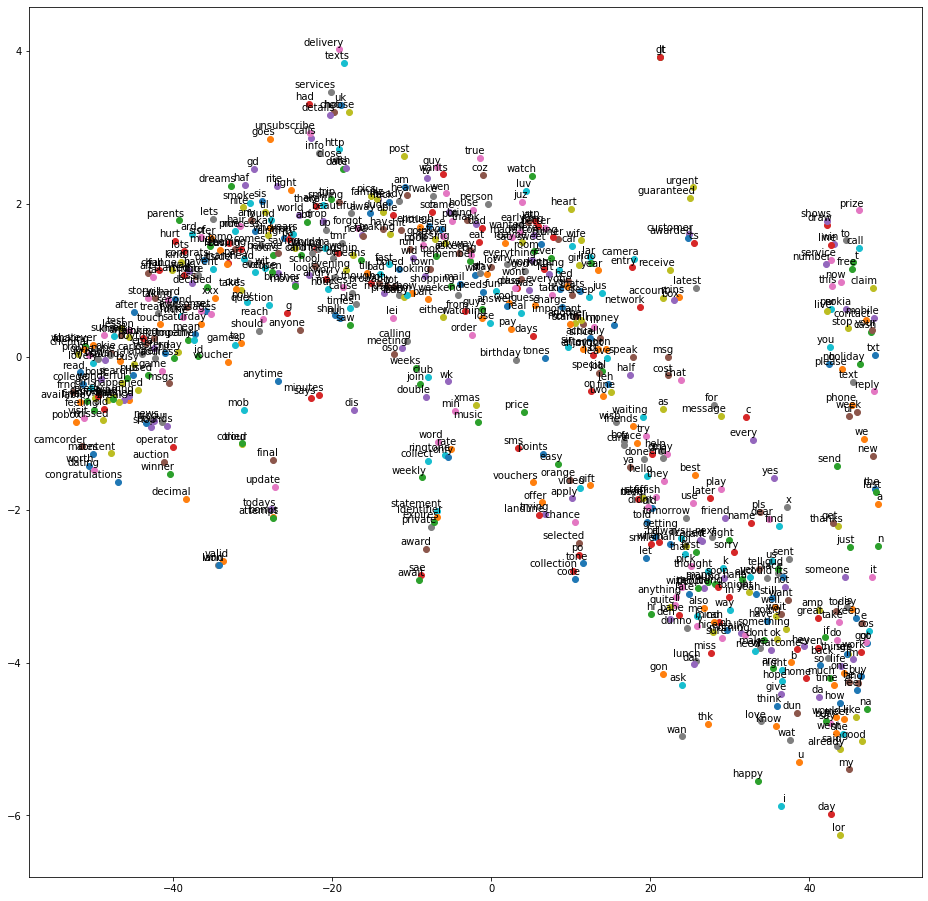

In [31]:
import gensim 
from gensim.models import Word2Vec
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

new_model = Word2Vec(corpus, size = 50, window = 20, min_count = 10, workers = 5)

def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model.wv[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity = 40, n_components = 2, init='pca', n_iter=5000, random_state = 33)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    ## plot the scattering of words
    plt.figure(figsize = (16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i], y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(new_model)

**Now, using `PCA` & `tsne` to plot the `cluster_classification` of this dataset**

In [135]:
padded_docs.shape, new_y.shape

keys = ['go', 'week', 'time', 'prize']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in new_model.wv.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(new_model.wv[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', 
                        n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m,
                                                                                      k))).reshape(n, m, 2)

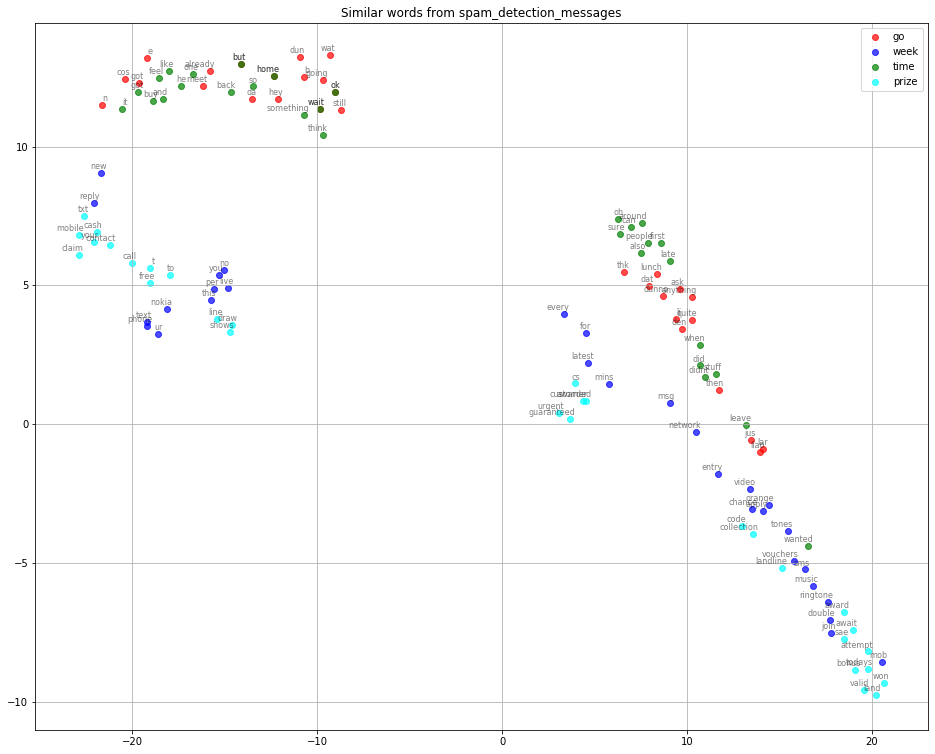

In [136]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt

def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a):
    plt.figure(figsize=(16, 13))
    list_colors = ['red', 'blue', 'green', 'cyan', 'magenta']
    colors = list_colors[:len(labels)]
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc= 'upper right')
    plt.title(title)
    plt.grid(True)
    plt.show()

tsne_plot_similar_words('Similar words from spam_detection_messages', keys, 
                        embeddings_en_2d, word_clusters, 0.7)

#### 4.2. Facial Expression Recognition
A lot of progress has been made on FER and many algorithms like PCA have been studied for FER. But, FER still remains a challenge due to the difficulties of dimension reduction and classification. t-Stochastic Neighbor Embedding (t-SNE) is used for reducing the high-dimensional data into a relatively low-dimensional subspace and then using other algorithms like AdaBoostM2, Random Forests, Logistic Regression, NNs and others as multi-classifier for the expression classification.

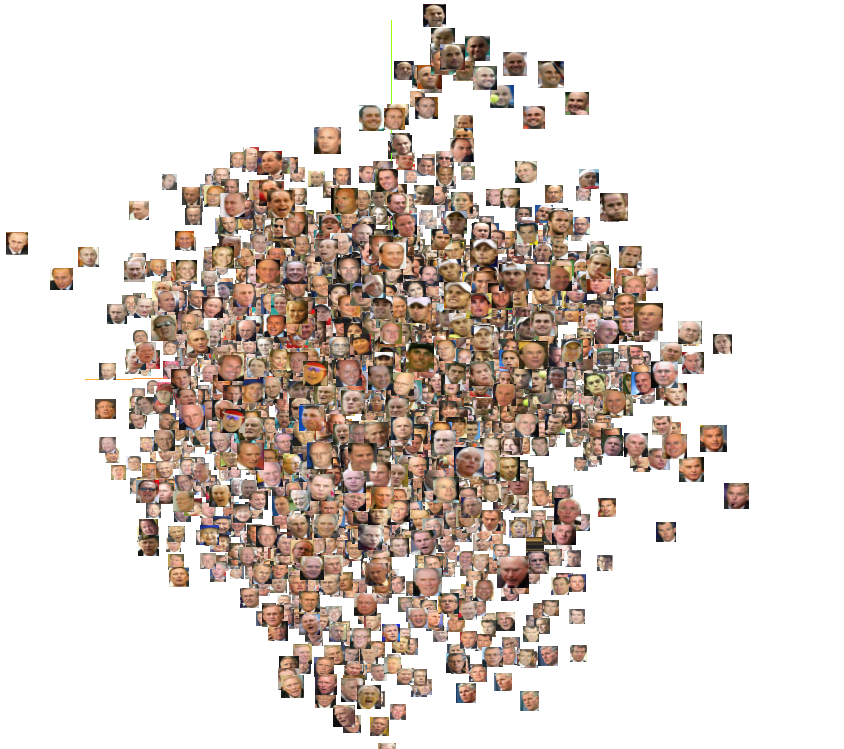

In [188]:
display(Image(r"C:\Users\Admin\Desktop\Nhan_pro\Data\tsne-face.png", width=860, unconfined=True))

#### 4.3. With `mnist` dataset

In [40]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
             discriminant_analysis, random_projection)
## Loading and curating the data
digits = datasets.load_digits(n_class=10)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

X.shape, y.shape

((1797, 64), (1797,))

In [41]:
## Function to Scale and visualize the embedding vectors
def plot_embedding(X, title=None, figsize = [10, 10]):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)     
    plt.figure(figsize = figsize)
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})
    if hasattr(offsetbox, 'AnnotationBbox'):
        ## only print thumbnails with matplotlib > 1.0
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(digits.data.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                ## don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Text(0.5, 1.0, 'A selection from the 64-dimensional digits dataset')

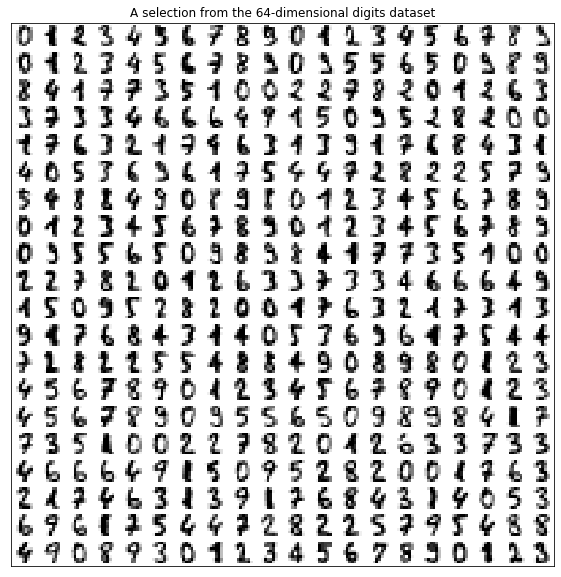

In [32]:
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))
plt.figure(figsize = [10, 10])
plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')

Computing PCA projection


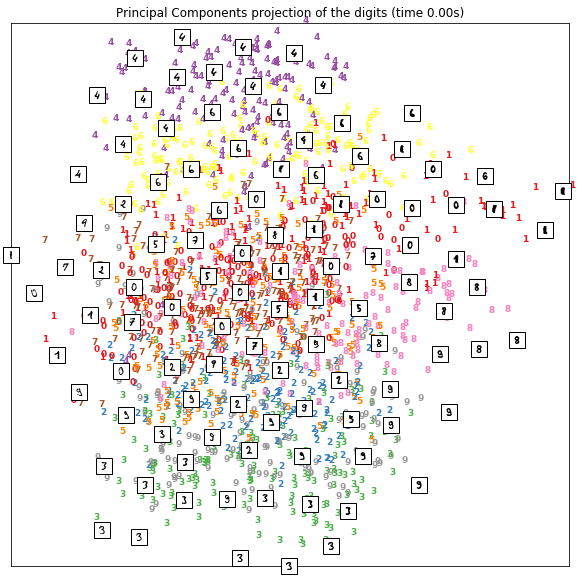

In [36]:
## Computing PCA
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

Computing t-SNE embedding


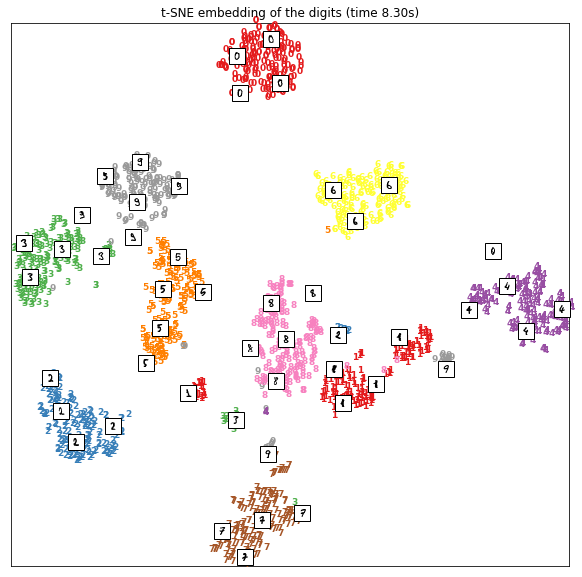

In [37]:
## Computing t-SNE
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)
plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))
plt.show()

#### 4.4. Identifying Tumor subpopulations (Medical Imaging)
Mass spectrometry imaging (MSI) is a technology that simultaneously provides the spatial distribution for hundreds of biomolecules directly from tissue. Spatially mapped t-distributed stochastic neighbor embedding (t-SNE), a nonlinear visualization of the data that is able to better resolve the biomolecular intratumor heterogeneity.

In an unbiased manner, t-SNE can uncover tumor subpopulations that are statistically linked to patient survival in gastric cancer and metastasis status in primary tumors of breast cancer. Survival analysis performed on each t-SNE clusters will provide significantly useful results.

## 5. Summarizes

### 5.1. Where and When to use t-SNE?
#### Data Scientist
Well for the data scientist the main problem while using t-SNE is the black box type nature of the algorithm. This impedes the process of providing inferences and insights based on the results. Also, another problem with the algorithm is that it doesn’t always provide a similar output on successive runs.

So then how could you use the algorithm? The best way to used the algorithm is to use it for exploratory data analysis. It will give you a very good sense of patterns hidden inside the data. It can also be used as an input parameter for other classification & clustering algorithms. 

#### Machine Learning Hacker
Reduce the dataset to 2 or 3 dimensions and stack this with a non-linear stacker. Using a holdout set for stacking / blending. Then you can boost the t-SNE vectors using XGboost to get better results.

#### Data Science Enthusiasts
For data science enthusiasts who are beginning to work with data science, this algorithm presents the best opportunities in terms of research and performance enhancements. There have been a few research papers attempting to improve the time complexity of the algorithm by utilizing linear functions. But an optimal solution is still required. Research papers on implementing t-SNE for a variety of NLP problems and image processing applications is an unexplored territory and has enough scope. 

### 5.2 Common Fallacies
Following are a few common fallacies to avoid while interpreting the results of t-SNE:

- For the algorithm to execute properly, the perplexity should be smaller than the number of points. Also, the suggested perplexity is in the range of (5 to 50)
- Sometimes, different runs with same hyper parameters may produce different results.
- Cluster sizes in any t-SNE plot must not be evaluated for standard deviation, dispersion or any other similar measures. This is because t-SNE expands denser clusters and contracts sparser clusters to even out cluster sizes. This is one of the reasons for the crisp and clear plots it produces.
- Distances between clusters may change because global geometry is closely related to optimal perplexity. And in a dataset with many clusters with different number of elements one perplexity cannot optimize distances for all clusters.
- Patterns may be found in random noise as well, so multiple runs of the algorithm with different sets of hyperparameter must be checked before deciding if a pattern exists in the data.
- Different cluster shapes may be observed at different perplexity levels.
- `Topology` cannot be analyzed based on a single t-SNE plot, multiple plots must be observed before making any assessment.

**Code of the `opening_illustration`**

***Visualising high-dimensional datasets using PCA and t-SNE in Python***

(60000, 28, 28) (60000,)
after merging then reshape:  (70000, 784) (70000,)
Size of the dataframe: (70000, 786)


<Figure size 432x288 with 0 Axes>

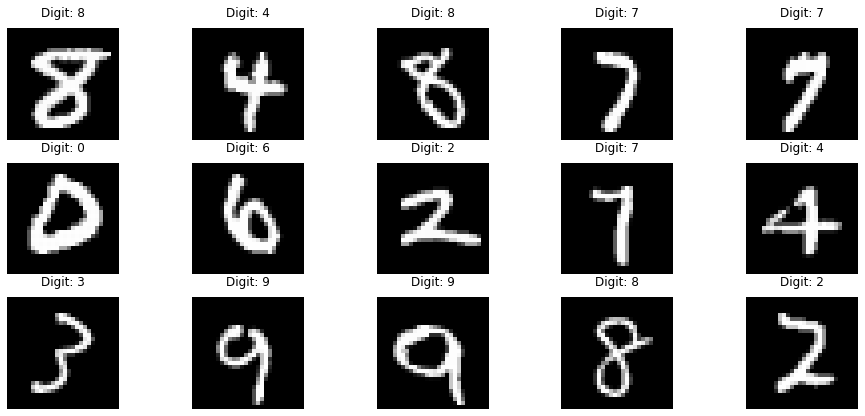

In [89]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape, y_train.shape)

X = np.concatenate((X_train, X_test))
y = np.concatenate((y_train, y_test))

X = X.reshape(X.shape[0], -1)
X = X.astype('float32')
X /= 255    

print('after merging then reshape: ', X.shape, y.shape)

feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X, columns = feat_cols)
df['y'] = y
df['label'] = df['y'].apply(lambda i: str(i))
X, y = None, None
print('Size of the dataframe: {}'.format(df.shape))

# For reproducability of the results
np.random.seed(42)
rndperm = np.random.permutation(df.shape[0])

plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'label'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
    ax.axis("off")
plt.show()

Explained variation per principal component: [0.09704657 0.07095923 0.06169081]


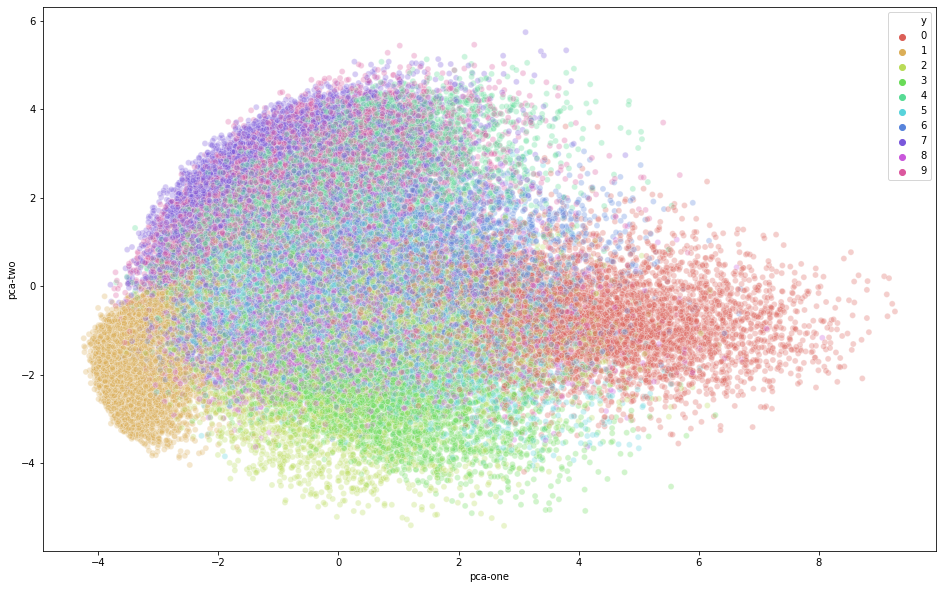

In [79]:
pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols].values)
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

plt.figure(figsize=(16,10))
sns.scatterplot(x = "pca-one", y = "pca-two",
                    hue = "y",
                    palette = sns.color_palette("hls", 10),
                    data = df.loc[rndperm,:],
                    legend = "full",
                    alpha = 0.3)

**For a 3d-version of the same plot**

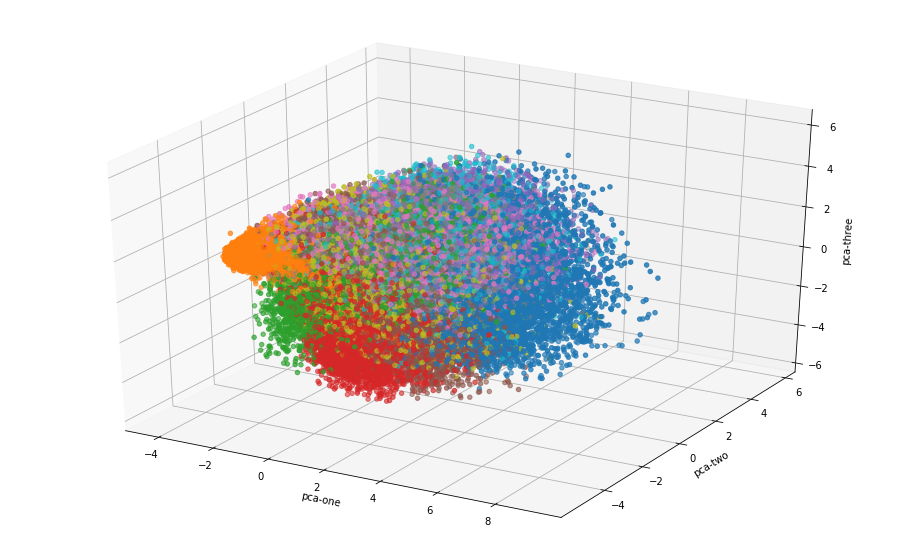

In [81]:
from mpl_toolkits.mplot3d import Axes3D

ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=df.loc[rndperm,:]["pca-one"], 
    ys=df.loc[rndperm,:]["pca-two"], 
    zs=df.loc[rndperm,:]["pca-three"], 
    c=df.loc[rndperm,:]["y"], 
    cmap='tab10'
)
ax.set_xlabel('pca-one')
ax.set_ylabel('pca-two')
ax.set_zlabel('pca-three')
plt.show()

**T-Distributed Stochastic Neighbouring Entities `(t-SNE)`**

In [84]:
N = 10000
df_subset = df.loc[rndperm[:N],:].copy()
data_subset = df_subset[feat_cols].values
pca = PCA(n_components=3)
pca_result = pca.fit_transform(data_subset)
df_subset['pca-one'] = pca_result[:,0]
df_subset['pca-two'] = pca_result[:,1] 
df_subset['pca-three'] = pca_result[:,2]
print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(data_subset)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

Explained variation per principal component: [0.09614981 0.07138544 0.06078235]
[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 2.020s...
[t-SNE] Computed neighbors for 10000 samples in 118.954s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 2.136576
[t-SNE] KL divergence after 250 iterations with early exaggeration: 85.881

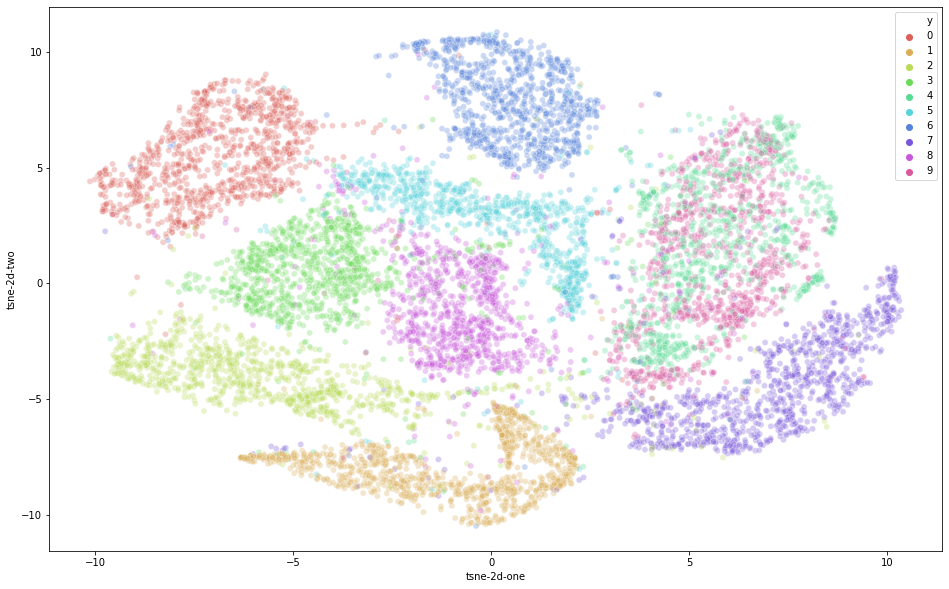

In [85]:
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(x = "tsne-2d-one", y = "tsne-2d-two",  hue="y",
                palette = sns.color_palette("hls", 10),
                data = df_subset, legend = "full", alpha = 0.3)

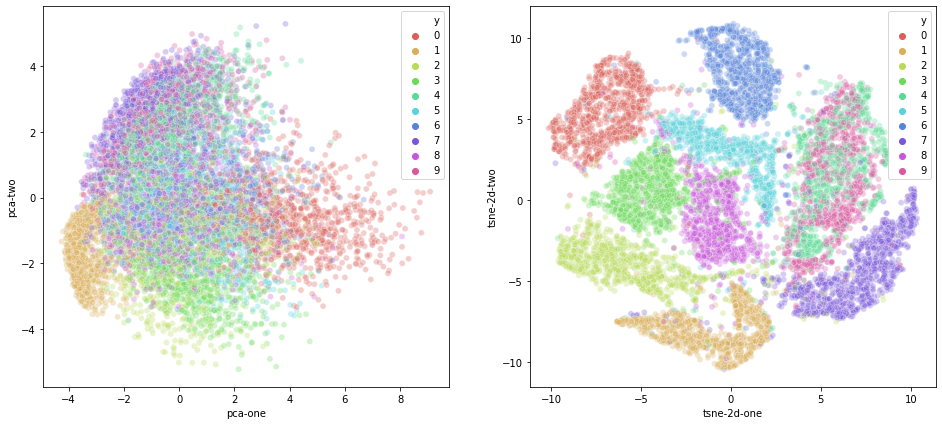

In [90]:
plt.figure(figsize=(16,7))
ax1 = plt.subplot(1, 2, 1)
sns.scatterplot(
    x="pca-one", y="pca-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax1
)
ax2 = plt.subplot(1, 2, 2)
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="y",
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=0.3,
    ax=ax2
)

## References

1 http://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html?highlight=tsne#sklearn.manifold.TSNEa

2 https://www.datacamp.com/community/tutorials/introduction-t-sne

3 L.J.P. van der Maaten and G.E. Hinton. Visualizing High-Dimensional Data Using  t-SNE. Journal of Machine Learning Research 9(Nov):2579-2605, 2008

4 https://github.com/Nhan121/Lectures_notes-teaching-in-VN-/blob/master/Statistics/Machine%20Learning/PCA.ipynb